# Import

In [7]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind


# Make summary

In [8]:
p = Path('/home/khali/scams/Results')


In [ ]:
LGBM_p = []
for it in p.iterdir():
    if str(it).split('/')[-1].split('_')[0] == 'LGBM':
        LGBM_p.append(str(it))
        

In [ ]:
a = pd.read_csv(Path(LGBM_p[0]) / 't-test_stats.csv', index_col=0)

In [ ]:
Metrics = a['Metrics'].to_list()

In [ ]:
def gather_stats(df_stats, metric):
    result = []
    for it in metric:
        AL = df_stats[df_stats['Metrics'] == it]['Mean AL'].to_list()[0]
        non_AL = df_stats[df_stats['Metrics'] == it]['Mean non AL'].to_list()[0]
        log = df_stats[df_stats['Metrics'] == it]['is_significant'].to_list()[0]
        if AL > non_AL and log:
            result.append('AL_T')
        if AL > non_AL and not log:
            result.append('AL_F')
        if AL < non_AL and log:
            result.append('N_AL_T')
        if AL < non_AL and not log:
            result.append('N_AL_F')
        if AL == non_AL:
            result.append('E')
    return result


In [ ]:
df_summry_stat = {}
for p in LGBM_p:
    c_p = Path(p) / 't-test_stats.csv'
    data_s = pd.read_csv(c_p, index_col=0)
    iter_res = gather_stats(data_s, Metrics)
    df_summry_stat[p.split('/')[-1]] = iter_res
    

In [ ]:
df_summry_stat = pd.DataFrame.from_dict(df_summry_stat, orient='index', columns=Metrics)

In [ ]:
df_summry_stat.to_csv('/home/khali/scams/Results/LGBM_summary.csv')

In [ ]:
values_counts = df_summry_stat.apply(pd.value_counts)


In [ ]:
values_counts.to_csv('/home/khali/scams/Results/LGBM_summary_values_counts.csv')

In [ ]:
values_counts.iloc[:, 0:7].fillna(0)

In [ ]:
values_counts.iloc[:, 7:].fillna(0)

# Are retrained values higher than non-AL

In [3]:
test_p = []
for it in p.iterdir():
    if str(it).split('/')[-1].split('_')[0] == 'test':
        test_p.append(str(it))
        

In [4]:
test_p

['/home/khali/scams/Results/test_LGBM_N_SF_TTS',
 '/home/khali/scams/Results/test_LGBM_N_SF_SS',
 '/home/khali/scams/Results/test_LGBM_N_SF_B']

In [5]:
def make_axes(names, fontsize, ncols=3, figsize=(16, 16), adjust_figsize=True, title=None,
              left=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4, bottom=0.05):
    nrows = (len(names) - 1) // ncols + 1  # Calculate number of rows

    if adjust_figsize:
        figsize = (figsize[0], figsize[0] * nrows / ncols)  # Adjust figure size

    fig, axs = plt.subplots(nrows, ncols, figsize=figsize)  # Make subplots
    delta = nrows * ncols - len(names)
    for i in range(delta):
        if nrows > 1:
            fig.delaxes(axs[nrows - 1, ncols - (i + 1)])  # Delete unnecessary axis
        else:
            fig.delaxes(axs[ncols - (i + 1)])

    fig.suptitle(title, fontsize=fontsize, verticalalignment='center')  # Add a centered title to the figure
    fig.tight_layout()  # Adjusts subplot params so that the subplot(s) fits in to the figure area
    # Adjust the subplot layout parameters
    fig.subplots_adjust(left=left, right=right, top=top, wspace=wspace, hspace=hspace, bottom=bottom)

    return axs, names

In [6]:
names_for_fig  = [i.split('/')[-1] for i in test_p]

In [45]:
a = pd.read_csv(Path(test_p[0]) / 'difference_smoothed_retrained.csv')

In [47]:
a['MCC test, smoothed']

0    0.528304
1    0.602572
2    0.456605
3    0.493674
4    0.508459
5    0.464311
6    0.512236
7    0.421325
8    0.461683
9    0.539595
Name: MCC test, smoothed, dtype: float64

In [48]:
a['MCC test, retrained']

0    0.519648
1    0.628690
2    0.459054
3    0.475226
4    0.517116
5    0.461957
6    0.513273
7    0.414515
8    0.452258
9    0.566148
Name: MCC test, retrained, dtype: float64

test_LGBM_N_SF_TTS
test_LGBM_N_SF_SS
test_LGBM_N_SF_B


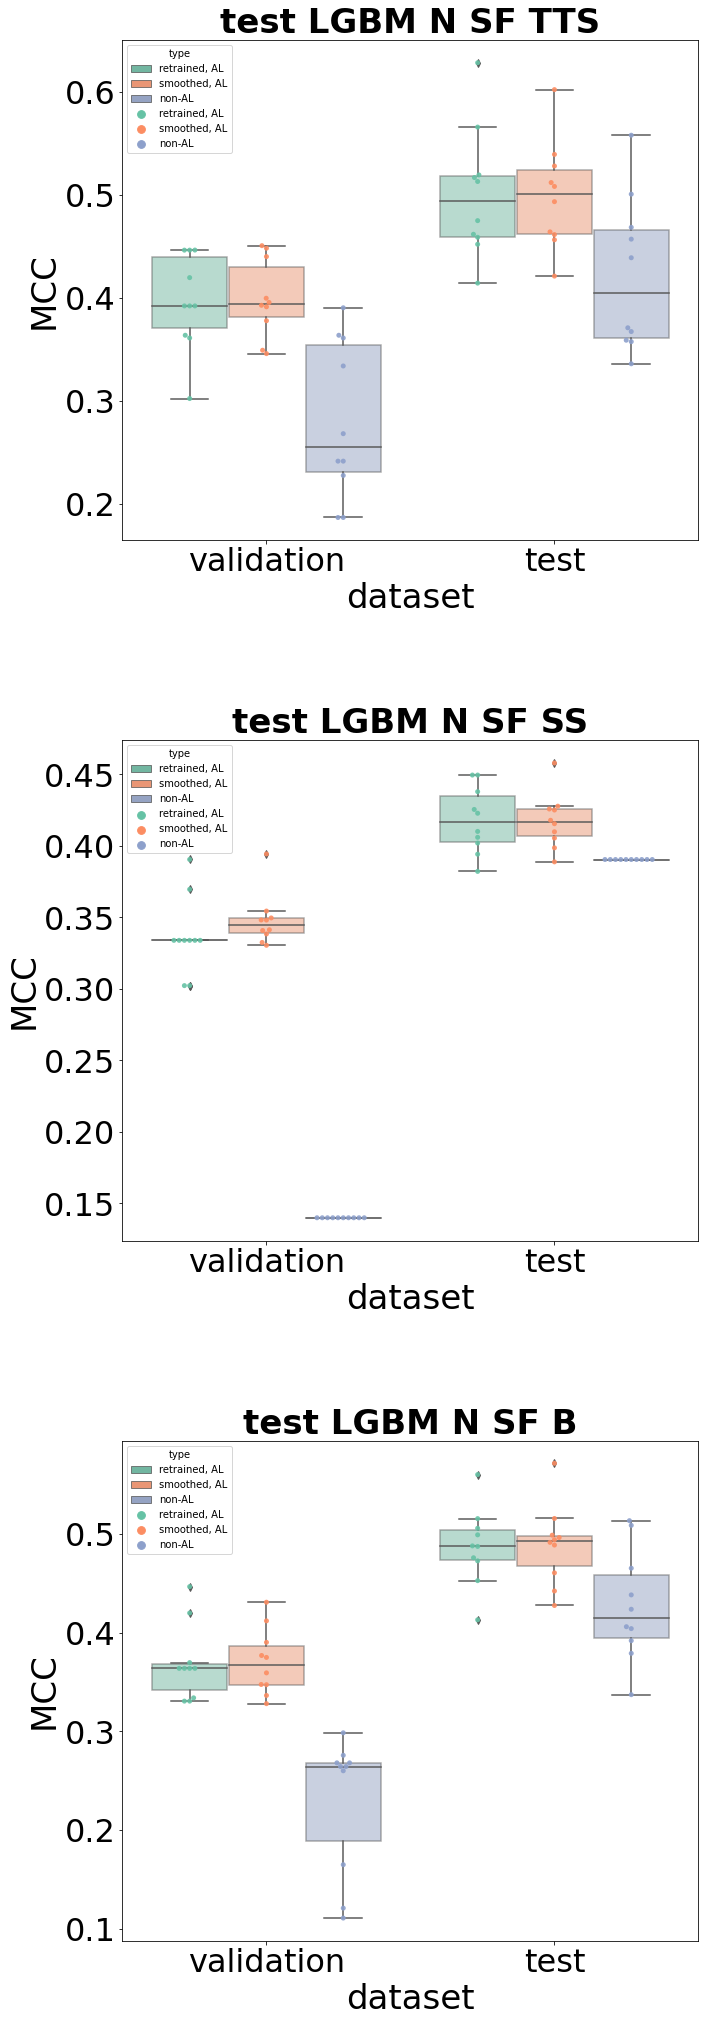

In [68]:
p_values_results = {}
# stat, p_value = ttest_ind(self.non_AL_stats[met], self.AL_stats[met])

af, names = make_axes(names_for_fig, fontsize=23, ncols=1, figsize=(10, 8),
                              top=0.95, wspace=0.4, hspace=0.4, bottom=0.07)  # Make axes
for i, axs in enumerate(af.flat):
    print(names_for_fig[i])
# for t_path in test_p:
    retrained = pd.read_csv(Path(test_p[i]) / 'difference_smoothed_retrained.csv')
    non_AL_stats = pd.read_csv(Path(test_p[i]) / 'non_AL_stats.csv')
    
    MCC_AL_val_retrained = retrained[['MCC validation, retrained']].copy()
    MCC_AL_val_retrained = MCC_AL_val_retrained.rename(columns={'MCC validation, retrained': 'MCC'})
    MCC_AL_val_retrained['dataset'] = 'validation'
    MCC_AL_val_retrained['type'] = 'retrained, AL'
    
    MCC_AL_val_smoothed = retrained[['MCC validation, smoothed']].copy()
    MCC_AL_val_smoothed = MCC_AL_val_smoothed.rename(columns={'MCC validation, smoothed': 'MCC'})
    MCC_AL_val_smoothed['dataset'] = 'validation'
    MCC_AL_val_smoothed['type'] = 'smoothed, AL'
    
    MCC_val_non_AL = non_AL_stats[['MCC_validation']].copy()
    MCC_val_non_AL = MCC_val_non_AL.rename(columns={'MCC_validation': 'MCC'})
    MCC_val_non_AL['dataset'] = 'validation'
    MCC_val_non_AL['type'] = 'non-AL'
    
    _, p_v_val_smoothed_retrained = ttest_ind(MCC_AL_val_smoothed['MCC'], MCC_AL_val_retrained['MCC'])
    p_values_results[names_for_fig[i] +  '_' + 'smoothed_vs_retrained' + '_validation'] = [4*p_v_val_smoothed_retrained]
    
    _, p_v_val_non_AL_retrained = ttest_ind(MCC_val_non_AL['MCC'], MCC_AL_val_retrained['MCC'])
    p_values_results[names_for_fig[i] + '_' + 'non_AL_vs_retrained' + '_validation'] = [4*p_v_val_non_AL_retrained]

    
    MCC_AL_test_retrained = retrained[['MCC test, retrained']].copy()
    MCC_AL_test_retrained = MCC_AL_test_retrained.rename(columns={'MCC test, retrained': 'MCC'})
    MCC_AL_test_retrained['dataset'] = 'test'
    MCC_AL_test_retrained['type'] = 'retrained, AL'
    
    
    MCC_AL_test_smoothed = retrained[['MCC test, smoothed']].copy()
    MCC_AL_test_smoothed = MCC_AL_test_smoothed.rename(columns={'MCC test, smoothed': 'MCC'})
    MCC_AL_test_smoothed['dataset'] = 'test'
    MCC_AL_test_smoothed['type'] = 'smoothed, AL'
    
    
    MCC_test_non_AL = non_AL_stats[['MCC_test']].copy()
    MCC_test_non_AL = MCC_test_non_AL.rename(columns={'MCC_test': 'MCC'})
    MCC_test_non_AL['dataset'] = 'test'
    MCC_test_non_AL['type'] = 'non-AL'
    
    _, p_v_test_smoothed_retrained = ttest_ind(MCC_AL_test_smoothed['MCC'], MCC_AL_test_retrained['MCC'])
    p_values_results[names_for_fig[i] +  '_' + 'smoothed_vs_retrained' + '_test'] = [4*p_v_test_smoothed_retrained]
    
    _, p_v_test_non_AL_retrained = ttest_ind(MCC_test_non_AL['MCC'], MCC_AL_test_retrained['MCC'])
    p_values_results[names_for_fig[i] + '_' + 'non_AL_vs_retrained' + '_test'] = [4*p_v_test_non_AL_retrained]

    
    
    
    
    final_for_run = pd.concat([MCC_AL_val_retrained, MCC_AL_test_retrained, 
                               MCC_AL_val_smoothed, MCC_AL_test_smoothed, 
                               MCC_test_non_AL, MCC_val_non_AL])
    sns.boxplot(x='dataset', y='MCC', hue='type', data=final_for_run, 
               ax=axs, palette="Set2", boxprops=dict(alpha=.5))
    sns.swarmplot(x='dataset', y='MCC', hue='type', data=final_for_run, 
               ax=axs, dodge=True, palette="Set2", alpha=0.9)
    axs.set_title(names_for_fig[i].replace('_', ' '), 
                 fontdict={'fontsize': 30,
                           'fontweight': 'bold'})
    axs.grid(False)
    label_fontsize = 34
    tick_fontsize = 32
    axs.title.set_fontsize(label_fontsize)  # Set title size
    axs.xaxis.label.set_fontsize(label_fontsize)  # Set x labels size
    axs.yaxis.label.set_fontsize(label_fontsize)  # Set y labels size
    axs.tick_params(axis="x", labelsize=tick_fontsize)  # Set x tick size
    axs.tick_params(axis="y", labelsize=tick_fontsize)
    
    
    

In [71]:
p_values_results = pd.DataFrame.from_dict(p_values_results, orient='index', columns=['p_val_adj'])

In [78]:
p_values_results.to_csv('t3.csv')

In [80]:
pd.read_csv('t3.csv', index_col=0)

,model_name,dataset,comparison,p_val_adj,is_significant
test_LGBM_N_SF_TTS_non_AL_vs_retrained_validation,LGBM_N_SF_TTS,validation,AL vs retrained,0.002520,True
test_LGBM_N_SF_TTS_non_AL_vs_retrained_test,LGBM_N_SF_TTS,test,AL vs retrained,0.075031,False
test_LGBM_N_SF_SS_non_AL_vs_retrained_validation,LGBM_N_SF_SS,validation,AL vs retrained,0.000000,True
test_LGBM_N_SF_SS_non_AL_vs_retrained_test,LGBM_N_SF_SS,test,AL vs retrained,0.005550,True
test_LGBM_N_SF_B_non_AL_vs_retrained_validation,LGBM_N_SF_B,validation,AL vs retrained,0.000111,True
test_LGBM_N_SF_B_non_AL_vs_retrained_test,LGBM_N_SF_B,test,AL vs retrained,0.048358,True
test_LGBM_N_SF_TTS_smoothed_vs_retrained_validation,LGBM_N_SF_TTS,validation,smoothed vs retrained,3.520861,False
test_LGBM_N_SF_TTS_smoothed_vs_retrained_test,LGBM_N_SF_TTS,test,smoothed vs retrained,3.765310,False
test_LGBM_N_SF_SS_smoothed_vs_retrained_validation,LGBM_N_SF_SS,validation,smoothed vs retrained,1.176642,False
test_LGBM_N_SF_SS_smoothed_vs_retrained_test,LGBM_N_SF_SS,test,smoothed vs retrained,3.768473,False


# Smoothing window

In [51]:
import re
import plotly.graph_objects as go

In [185]:
test_smoothed = []
for it in p.iterdir():
    if re.search("test_[0-9]", str(it)) is not None:
        test_smoothed.append(str(it))


In [186]:
result = pd.read_csv('/home/khali/scams/Results/test_19_LGBM_N_SF_TTS/t-test_stats.csv', 
            index_col=0)


In [187]:
def bool_to_strint(b_v):
    if b_v:
        return 'True'
    else:
        return 'False'

In [188]:
result['Summary'] = result['Metrics'] + ',\n ' + result['is_significant'].apply(lambda x: bool_to_strint(x))

In [189]:
delta = result['Mean AL'] - result['Mean non AL']

In [190]:
delta.mean()

0.036225587760728366

In [191]:
result['Summary'] = result['Metrics']

In [192]:
title="Playing with Fonts"

In [193]:
def make_radar_chart(path):
    delta_stats = {}
    r_name = '_'.join(path.split('/')[-1].split('_')[1:])
    run_summaty_file = pd.read_csv(Path(path) / 't-test_stats.csv')
    AL = run_summaty_file['Mean AL']
    non_AL = run_summaty_file['Mean non AL']
    delta = AL - non_AL
    
    r_name = r_name + ', ' + str(round(delta.mean(), 6))
    run_summaty_file['Summary'] = run_summaty_file['Metrics'] + ',\n ' + run_summaty_file['is_significant'].apply(lambda x: bool_to_strint(x))
    # Make adaptive max score
    max_perf = max(max(AL), max(non_AL))
    if max_perf + max_perf*0.1 > 1:
        max_perf = 1
    else:
        max_perf = max_perf + max_perf * 0.1

    radar = go.Figure()
    radar.add_trace(go.Scatterpolar(
        r=AL,
        theta=run_summaty_file['Summary'],
        fill='toself',
        name='AL strategy'
    ))
    radar.add_trace(go.Scatterpolar(
        r=non_AL,
        theta=run_summaty_file['Summary'],
        fill='toself',
        name='Non-AL strategy'
    ))
    radar.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, max_perf]
            )),
        showlegend=True, title=r_name
    )
    radar_plot_path =  Path(path) / 'AL_non_AL_performance.png'
    print(radar_plot_path)
    radar.write_image(str(radar_plot_path))
    return r_name, delta.mean()


In [194]:
# test_smoothed.remove('/home/khali/scams/Results/test_27_LGBM_N_SF_TTS')

In [195]:
test_smoothed

['/home/khali/scams/Results/test_21_LGBM_N_SF_TTS',
 '/home/khali/scams/Results/test_19_LGBM_N_SF_TTS',
 '/home/khali/scams/Results/test_17_LGBM_N_SF_TTS',
 '/home/khali/scams/Results/test_29_LGBM_N_SF_TTS',
 '/home/khali/scams/Results/test_13_LGBM_N_SF_TTS',
 '/home/khali/scams/Results/test_7_LGBM_N_SF_TTS',
 '/home/khali/scams/Results/test_9_LGBM_N_SF_TTS',
 '/home/khali/scams/Results/test_23_LGBM_N_SF_TTS',
 '/home/khali/scams/Results/test_11_LGBM_N_SF_TTS',
 '/home/khali/scams/Results/test_27_LGBM_N_SF_TTS',
 '/home/khali/scams/Results/test_25_LGBM_N_SF_TTS',
 '/home/khali/scams/Results/test_15_LGBM_N_SF_TTS']

In [196]:
delta_stats = {}
for path in test_smoothed:
    name, delta = make_radar_chart(path)
    delta_stats[name] = delta

/home/khali/scams/Results/test_21_LGBM_N_SF_TTS/AL_non_AL_performance.png
/home/khali/scams/Results/test_19_LGBM_N_SF_TTS/AL_non_AL_performance.png
/home/khali/scams/Results/test_17_LGBM_N_SF_TTS/AL_non_AL_performance.png
/home/khali/scams/Results/test_29_LGBM_N_SF_TTS/AL_non_AL_performance.png
/home/khali/scams/Results/test_13_LGBM_N_SF_TTS/AL_non_AL_performance.png
/home/khali/scams/Results/test_7_LGBM_N_SF_TTS/AL_non_AL_performance.png
/home/khali/scams/Results/test_9_LGBM_N_SF_TTS/AL_non_AL_performance.png
/home/khali/scams/Results/test_23_LGBM_N_SF_TTS/AL_non_AL_performance.png
/home/khali/scams/Results/test_11_LGBM_N_SF_TTS/AL_non_AL_performance.png
/home/khali/scams/Results/test_27_LGBM_N_SF_TTS/AL_non_AL_performance.png
/home/khali/scams/Results/test_25_LGBM_N_SF_TTS/AL_non_AL_performance.png
/home/khali/scams/Results/test_15_LGBM_N_SF_TTS/AL_non_AL_performance.png


In [197]:
x_LGBM_N_SF_TTS = []
y_LGBM_N_SF_TTS = []

In [198]:
for key, value in delta_stats.items():
    x_LGBM_N_SF_TTS.append(key.split('_')[0])
    y_LGBM_N_SF_TTS.append(value)

In [199]:
y_LGBM_N_SF_TTS

[0.037484956250536085,
 0.036225587760728366,
 0.03219398615317292,
 0.0281622893888212,
 0.053851936246109094,
 0.06118318408582393,
 0.04104844809234363,
 0.03323188363105508,
 0.04933812887278064,
 0.0358953662818274,
 0.029368602111143297,
 0.043791900245502835]

In [200]:
def plot_retrain_delta(x, y, name, label_fontsize=22,
                       tick_fontsize=20):
    fig, ax = plt.subplots(figsize=(15, 10))

    ax.plot(x, y, label=name)
    ax.legend()
    ax.set_title('Delta performance with different smoothing window',
                 fontdict={'fontsize': label_fontsize,
                           'fontweight': 'bold'})
    ax.set_xlabel('Window width')  # Add x label
    ax.set_ylabel('Mean delta performamce between AL and non-AL')  # Add y label
    ax.title.set_fontsize(label_fontsize)  # Set title size
    ax.xaxis.label.set_fontsize(label_fontsize)  # Set x labels size
    ax.yaxis.label.set_fontsize(label_fontsize)  # Set y labels size
    ax.tick_params(axis="x", labelsize=tick_fontsize)  # Set x tick size
    ax.tick_params(axis="y", labelsize=tick_fontsize)  # Set y tick size
    fig.savefig('{}.png'.format(name))

In [201]:
x_LGBM_N_SF_TTS

['21', '19', '17', '29', '13', '7', '9', '23', '11', '27', '25', '15']

In [202]:
d_LGBM_N_SF_TTS = {}
for i, val in enumerate(x_LGBM_N_SF_TTS):
    d_LGBM_N_SF_TTS[int(val)] = y_LGBM_N_SF_TTS[i]

In [203]:
d_LGBM_N_SF_TTS

{21: 0.037484956250536085,
 19: 0.036225587760728366,
 17: 0.03219398615317292,
 29: 0.0281622893888212,
 13: 0.053851936246109094,
 7: 0.06118318408582393,
 9: 0.04104844809234363,
 23: 0.03323188363105508,
 11: 0.04933812887278064,
 27: 0.0358953662818274,
 25: 0.029368602111143297,
 15: 0.043791900245502835}

In [204]:
sorted_d_LGBM_N_SF_TTS = {k: d_LGBM_N_SF_TTS[k] for k in sorted(d_LGBM_N_SF_TTS, reverse=False)}


In [205]:
x_LGBM_N_SF_TTS = [k for k in sorted_d_LGBM_N_SF_TTS.keys()]

In [206]:
y_LGBM_N_SF_TTS = [v for v in sorted_d_LGBM_N_SF_TTS.values()]

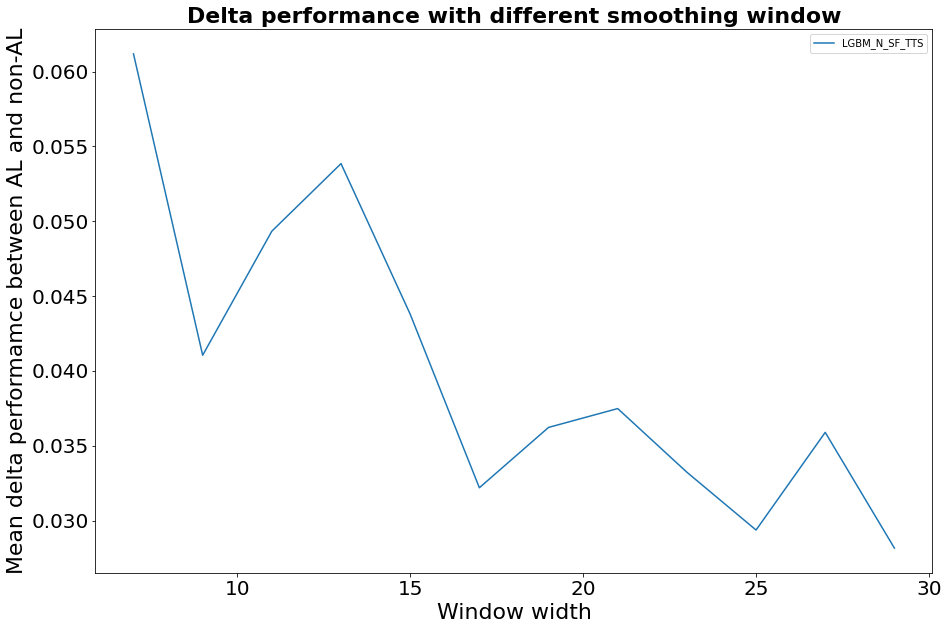

In [207]:
plot_retrain_delta(x_LGBM_N_SF_TTS, y_LGBM_N_SF_TTS, 'LGBM_N_SF_TTS')